# About this Dataset

This customer churn dataset contains 440,833 records, each representing an individual customer profile from a subscription-based business. The dataset includes a comprehensive set of features capturing demographic information (age, gender), account tenure, usage frequency, customer support interactions, payment delays, subscription type, contract length, total spend, last interaction date, and a churn indicator.

# Key fields include:

1-CustomerID: Unique identifier for each customer

2-Age / Gender: Demographic data

3-Tenure: Length of customer relationship (months)

4-Usage Frequency: Number of times the service was used

5-Support Calls: Number of support interactions

6-Payment Delay: Number of late payments or days overdue

7-Subscription Type & Contract Length: Plan and commitment details

8-Total Spend: Total revenue generated by the customer

9-Last Interaction: Time since last customer engagement

10-Churn: Binary indicator (1 = customer left, 0 = customer retained)

# Business Problem

Subscription-based businesses often face significant revenue loss due to customer churn—the rate at which customers cancel their service. Acquiring new customers is usually far more expensive than retaining existing ones, making churn reduction a high-priority business goal. However, without predictive analytics, it is difficult to know which customers are most likely to leave and which actions will be most effective in retaining them.

# Project Objectives

Identify Key Churn Drivers: Analyze customer behavior and profile data to uncover the main factors contributing to churn.


Segment High-Risk Customers:Group customers by risk level to enable more targeted retention strategies.


Recommend Retention Actions:Provide actionable insights for marketing and customer success teams to intervene and reduce churn.


Predict Customer Churn: Build a data-driven model to accurately predict which customers are at risk of cancelling their subscription.


Quantify Business Impact:Estimate the potential improvement in customer lifetime value (CLV) and reduction in churn rate achievable through targeted retention campaigns.

# Expected Outcomes

Accurate churn prediction model with actionable risk scores for each customer.

Data visualizations and dashboards (e.g., in Tableau) to monitor churn rates, high-risk segments, and the impact of interventions.

Clear identification of behavioral and demographic churn drivers to inform future business strategy.

Tailored recommendations for retention campaigns to maximize customer loyalty and minimize revenue loss.

Projected increase in CLV and reduction in overall churn rate as a result of implementing model-driven retention actions.

# 1- Importing Libraries

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 2 - Loading the Dataset

In [38]:
df  =pd.read_csv("customer_churn_dataset-training-master.csv")
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


# 3-  Understanding the Dataset

In [41]:
df.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [45]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [47]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

# 4- Cleaning and Transforming the Dataset

In [50]:
df.isnull().sum()


CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [52]:
df =df.dropna()

In [54]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [56]:
df.duplicated().sum()

0

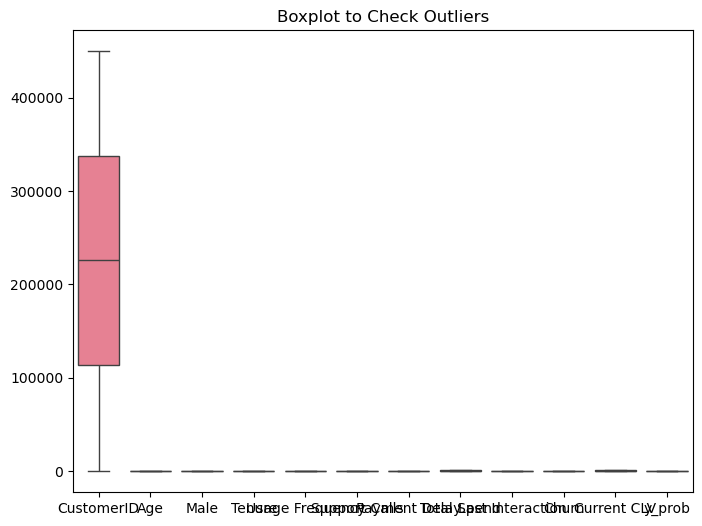

In [168]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.boxplot(df)
plt.title('Boxplot to Check Outliers')
plt.show()


# 5 - Statistical Analysis


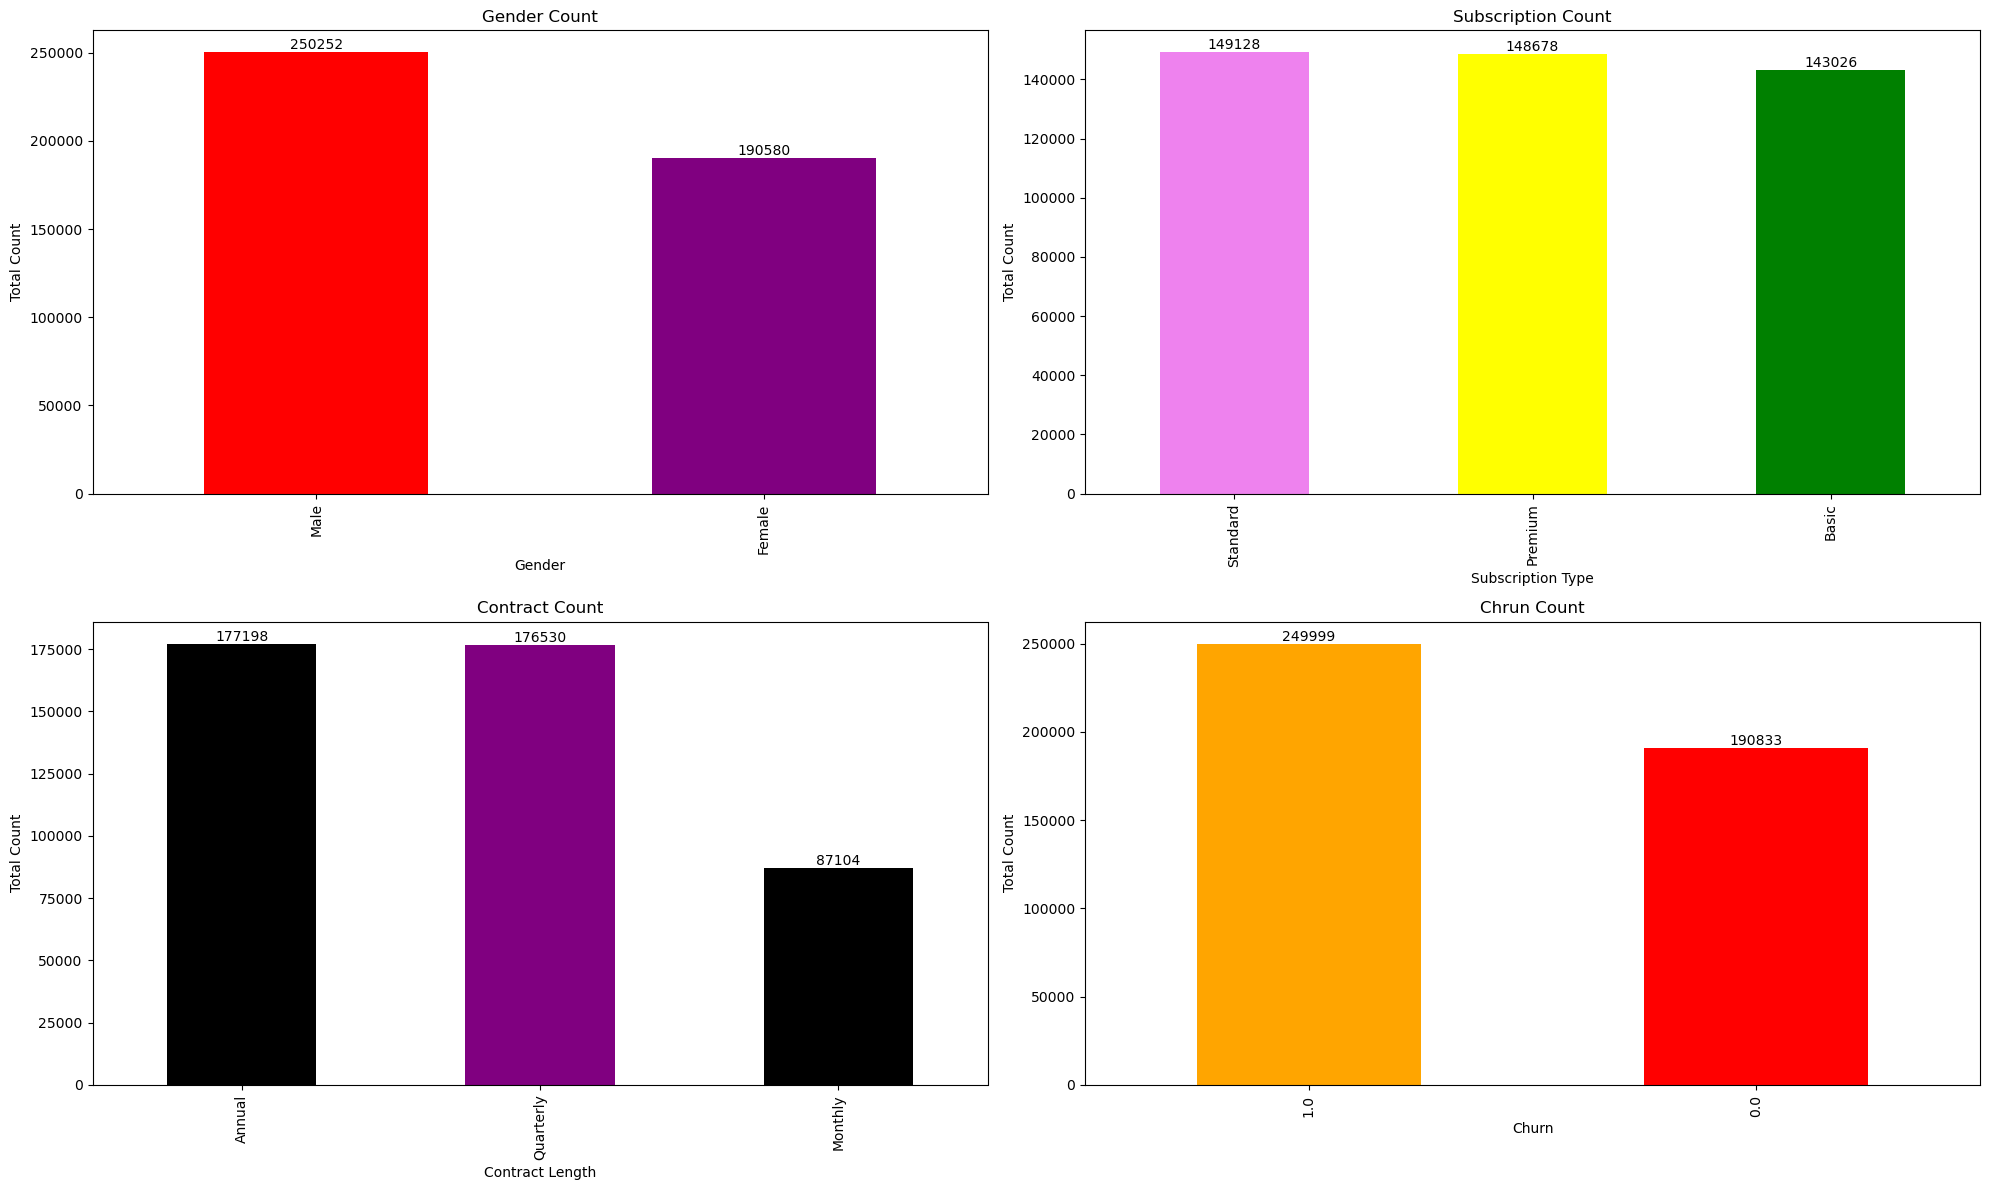

In [60]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.title("Gender Count")
plt.xlabel("Gender")
plt.ylabel("Total Count")
ax = df["Gender"].value_counts().plot(kind="bar",color=["red","purple"])
for container in ax.containers:
    ax.bar_label(container)



plt.subplot(2,2,2)
plt.title("Subscription Count")
plt.xlabel("Subscription Type")
plt.ylabel("Total Count")
ax = df["Subscription Type"].value_counts().plot(kind="bar",color=["violet","yellow","green"])
for container in ax.containers:
        ax.bar_label(container)


plt.subplot(2,2,3)
plt.title("Contract Count")
plt.xlabel("Contract Length Type")
plt.ylabel("Total Count")
ax = df["Contract Length"].value_counts().plot(kind="bar",color=["black","purple"])
for container in ax.containers:
        ax.bar_label(container)



plt.subplot(2,2,4)
plt.title("Chrun Count")
plt.xlabel("Churn Rate")
plt.ylabel("Total Count")
ax = df["Churn"].value_counts().plot(kind="bar",color=["orange","red"])
for container in ax.containers:
        ax.bar_label(container)
plt.tight_layout()
plt.show()

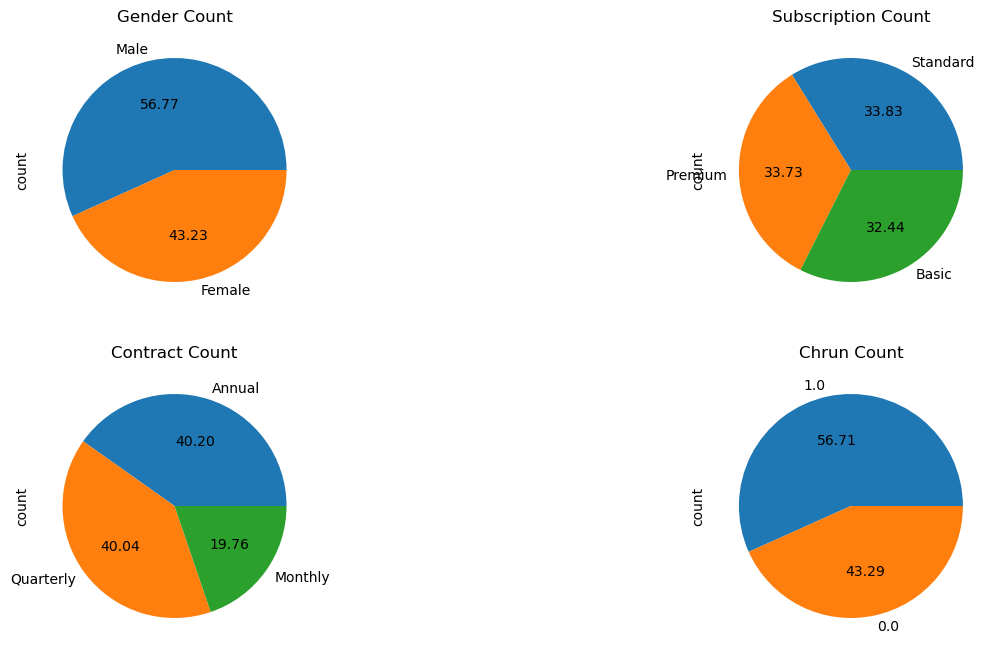

In [61]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.title("Gender Count")
df["Gender"].value_counts().plot(kind="pie",autopct="%0.2f")




plt.subplot(2,2,2)
plt.title("Subscription Count")
df["Subscription Type"].value_counts().plot(kind="pie",autopct="%0.2f")



plt.subplot(2,2,3)
plt.title("Contract Count")
df["Contract Length"].value_counts().plot(kind="pie",autopct="%0.2f")
for container in ax.containers:
        ax.bar_label(container)



plt.subplot(2,2,4)
plt.title("Chrun Count")
df["Churn"].value_counts().plot(kind="pie",autopct="%0.2f")
plt.show()

# Observations-:

1)-Gender Distribution: The customer base is 56% male and 44% female, indicating a slight male dominance in the use of the company’s telecom services.

2)-Subscription Type Mix:The three subscription tiers (Standard, Basic, Premium) are almost evenly split, each representing approximately 33% of the user base.

3)-Contract Length Preference: Most customers opt for longer-term contracts, with both Annual and Quarterly contracts accounting for about 40% each. Monthl contracts are less popular, chosen by only about 20% of customers.

4)-Churn Rate:The churn rate is relatively high: 56% of customers have left the service, suggesting significant challenges in customer retention and a major opportunity for business improvement.

# 6-Explanatory Data Analysis and Segmentation

# Anlaysing Behavioral Churn Drivers/High Risk Segments

# 1 -What is the overall churn rate in the dataset?
    How many customers have churned vs. retained?
    What is the proportion (percentage) of churned customers?

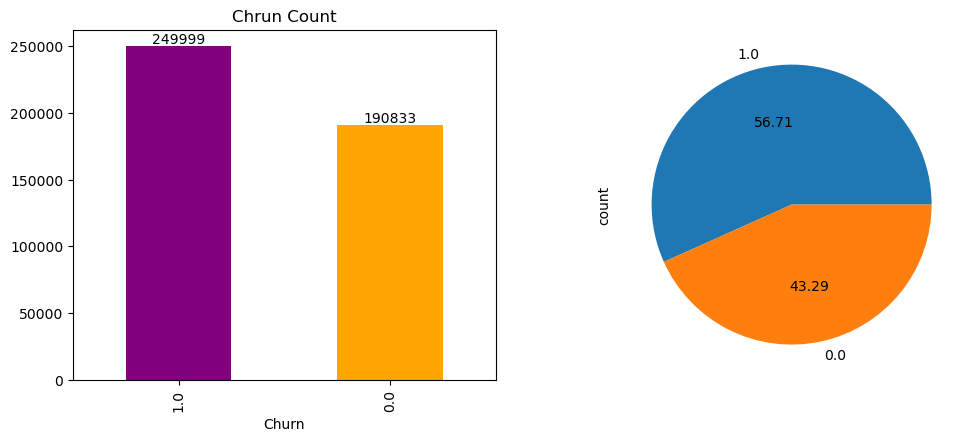

In [66]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title("Chrun Count")
ax = df["Churn"].value_counts().plot(kind="bar",color=["purple","orange"])
for container in ax.containers:
        ax.bar_label(container)

plt.subplot(2,2,2)
df["Churn"].value_counts().plot(kind="pie",autopct="%0.2f")
plt.show()

# Observation: Overall Churn Rate-:

1-The dataset reveals that approximately 249,999 customers—about 56%—have churned (i.e., discontinued their service), while only around 44% of customers have been retained.

2-This high churn rate highlights a significant retention challenge for the company.
                                                                   
# Business Implication_:
With more than half of customers leaving, the company is potentially losing substantial revenue and incurring higher costs to acquire new users.
Improving the retention rate is critical to sustainable business growth and profitability.

# Recommendation-

Conduct deeper analysis to identify the key drivers of churn (e.g., contract length, support calls, payment delays).

Develop targeted retention strategies to address the needs of high-risk customer segments.

Monitor churn and retention metrics continuously to assess the impact of interventions.


# 2.What are the demographic profiles of churned vs.retained customers?
     Does churn rate differ by age group or gender?
     Are there certain demographics more likely to leave?


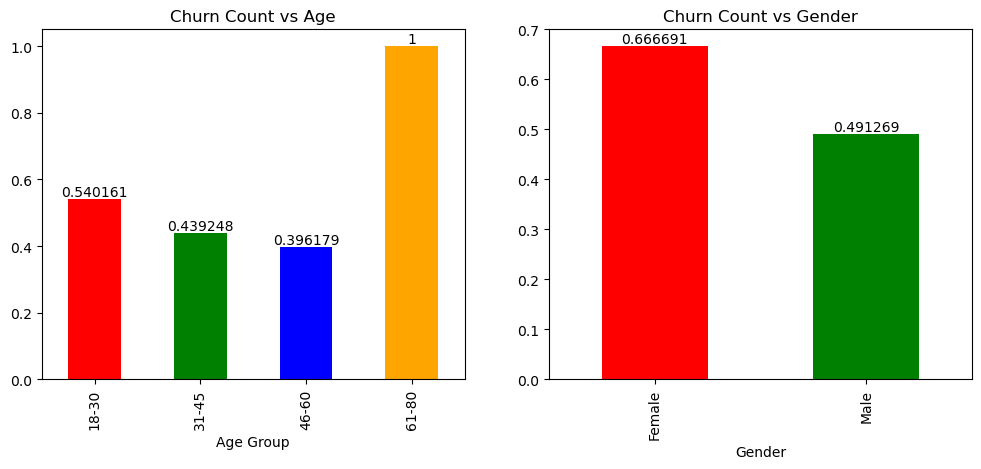

In [73]:
df["Age Group"] = pd.cut(df["Age"],bins=[18,30,45,50,65],labels=['18-30','31-45','46-60','61-80'])
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title("Churn Count vs Age")
ax = df.groupby("Age Group")["Churn"].mean().plot(kind="bar",color=["red","green","blue","orange"])
for container in ax.containers:
        ax.bar_label(container)
plt.subplot(2,2,2)
plt.title("Churn Count vs Gender")
ax1 = df.groupby("Gender")["Churn"].mean().plot(kind="bar",color=["red","green"])
for container in ax1.containers:
        ax1.bar_label(container)
plt.show()


# Observations

1. Churn by Age Group
Customers over 60 years old have an almost 100% churn rate—virtually all leave the service.
The churn rate drops sharply for the 31–60 age group (about 40% churn), making this segment the most stable.
Younger customers (18–30) also have a higher churn rate (around 54%), indicating they are less loyal or more likely to switch providers.


3. Churn by Gender
Females exhibit a higher churn rate (66%) compared to males (49%).
Although males represent a larger portion of the customer base, they are less likely to churn.


# Possible Reasons

Age 60+:Lower technology adoption or changes in lifestyle may lead older customers to discontinue telecom services.

Age 18–30:Younger customers may frequently switch providers to find better deals or improved service quality.

Gender Gap:The higher churn rate among females could be due to unmet service expectations or differences in usage patterns—this requires further investigation (e.g., customer feedback, product fit).

# Recommendations

Focus retention efforts on the 31–60 age group:This segment has the lowest churn risk and can be nurtured for higher lifetime value. Provide loyalty programs, exclusive offers, and personalized communication to reinforce their satisfaction.

Develop targeted initiatives for at-risk groups:

# For older customers (60+):
Simplify service offerings, provide dedicated customer support, and offer education on digital tools to increase engagement and retention.

# For younger customers (18–30):
Highlight flexible plans, rewards for loyalty, and regular service upgrades to discourage switching.

# For female customers:
Investigate the reasons for higher churn (via surveys or focus groups) and tailor products, services, or support to better meet their needs.

# 3.How does customer tenure relate to churn?
    Are newer or longer-tenure customers more likely to churn?
    What is the average tenure of churned vs. retained customers


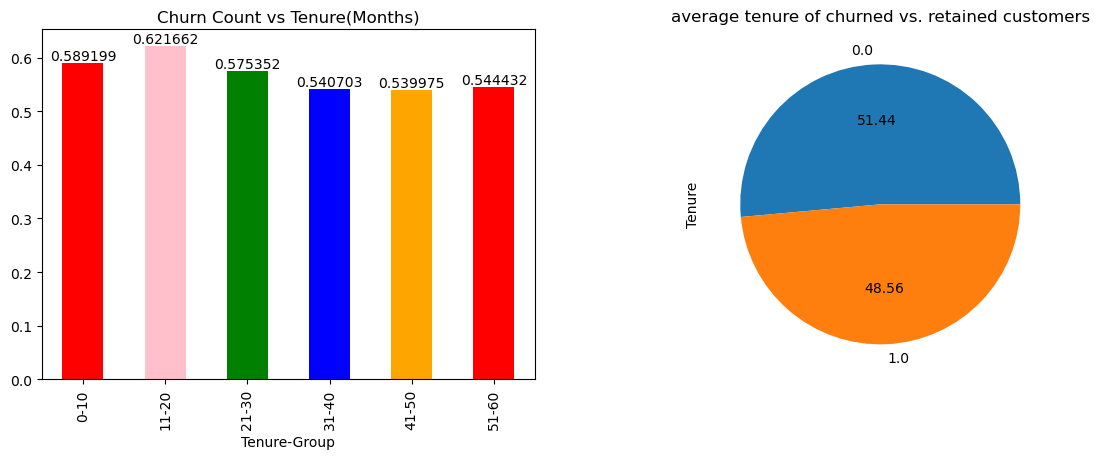

In [77]:
df["Tenure-Group"] = pd.cut(df["Tenure"],bins=[0,10,20,30,40,50,60],labels=['0-10','11-20','21-30','31-40','41-50','51-60'])
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.title("Churn Count vs Tenure(Months)")
ax = df.groupby("Tenure-Group")["Churn"].mean().plot(kind="bar",color=["red","pink","green","blue","orange"])
for container in ax.containers:
        ax.bar_label(container)
plt.subplot(2,2,2)
plt.title("average tenure of churned vs. retained customers")
ax1 = df.groupby("Churn")["Tenure"].mean().plot(kind="pie",autopct="%0.2f")
for container in ax1.containers:
        ax1.bar_label(container)
plt.show()

# Observations

Churn Rate by Customer Tenure:Customers with 21–60 months of tenure have a lower mean churn rate (55%) compared to customers who are newer (less than 1 year), who have a mean churn rate of 60%.

Average Tenure by Status:The average tenure for retained customers is 32 months, while for churned customers it is 30 months.
This small difference suggests that even long-term customers are at risk of churning, not just new users.
    
# Reasons
    
1-Lower Churn for Long-Tenure Customers:
Customers who have used the service for more than 20 months may be more satisfied or have integrated the service into their routine, making them less likely to churn.
    
2-New users may churn at a higher rate due to unmet expectations, initial dissatisfaction, or simply testing different providers before committing.
    
3-Churn Among Long-Term Users:
The fact that customers with high tenure still churn indicates that ongoing issues—such as unresolved support requests, lack of new features, or declining satisfaction—can lead to eventual discontinuation, even after a long period of loyalty.
    
# Recommendations

Focus on Both New and Long-Term Customers:
Invest in ongoing improvements to customer support and service reliability to keep long-term customers satisfied.
Monitor feedback and quickly address issues for both new and established users.

Enhance Onboarding and Early Engagement:
For new customers, provide a high-quality onboarding experience, including product demos, personalized support, and introductory offers to build trust and engagement from the beginning.
Offer exclusive deals or loyalty rewards to encourage continued usage beyond the initial months.

# 4.What usage patterns are associated with higher churn?
    How does usage frequency differ between churned and active customers?
    Is low/high usage a churn signal?


In [81]:
df["Usage Frequency"].max()
df["UsageFrequncyCategory10"] = pd.cut(df["Usage Frequency"],bins= [0,8,16,30],labels =["Low Usage(0-8)","Medium Usage(8-16)","High Usage(16-30)"])

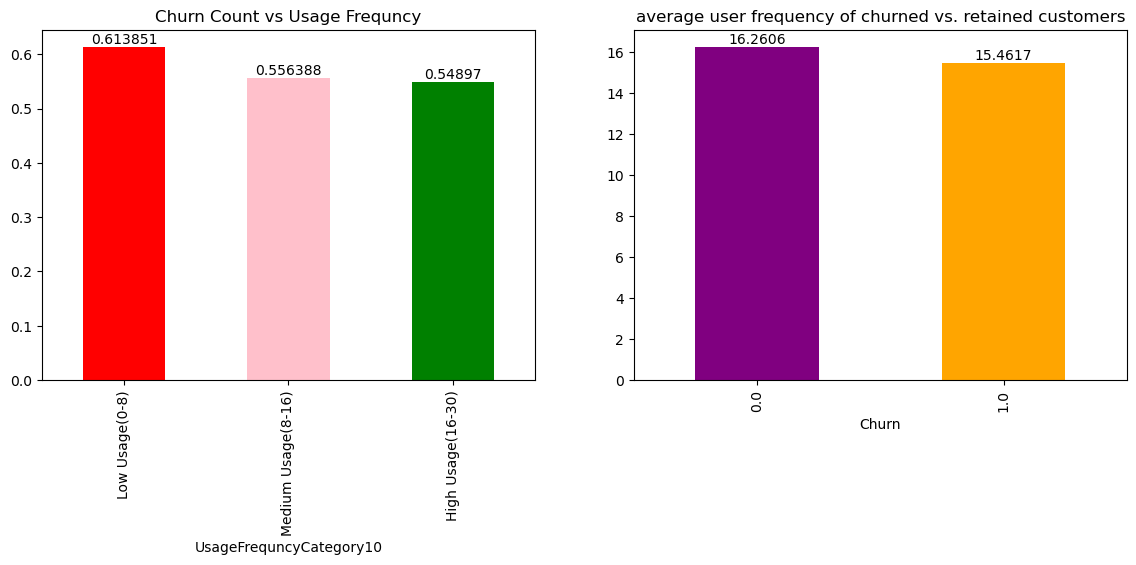

In [83]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.title("Churn Count vs Usage Frequncy")
ax = df.groupby("UsageFrequncyCategory10")["Churn"].mean().plot(kind="bar",color=["red","pink","green","blue","orange"])
for container in ax.containers:
        ax.bar_label(container)

plt.subplot(2,2,2)
plt.title("average user frequency of churned vs. retained customers")
ax1 = df.groupby("Churn")["Usage Frequency"].mean().plot(kind="bar",color=["purple","orange"])
for container in ax1.containers:
        ax1.bar_label(container)
plt.show()


# Observations

Usage Frequency and Churn:Customers who use the service less than 8 days per month have a higher churn rate (61%) compared to those with medium or high usage (more than 10 days per month), who have a churn rate of about 55%.
Average Usage Frequency:
The average usage frequency is similar for both churned and retained customers (16 days per month), suggesting that while very low usage predicts higher churn, the overall difference in average usage between the two groups is minimal.

# Recommendations-:

Low usage is a warning sign: Customers with very low engagement are more likely to churn, so they should be targeted for re-engagement campaigns.
    
Average usage alone isn’t a strong discriminator: Since the averages are the same for both groups, it’s the extremes (very low or perhaps very high usage) that may require closer attention, not just the overall mean.



# 5.	How do support interactions impact churn?
       Do customers with more support calls have higher churn?
       Is there a threshold where support calls sharply increase churn risk


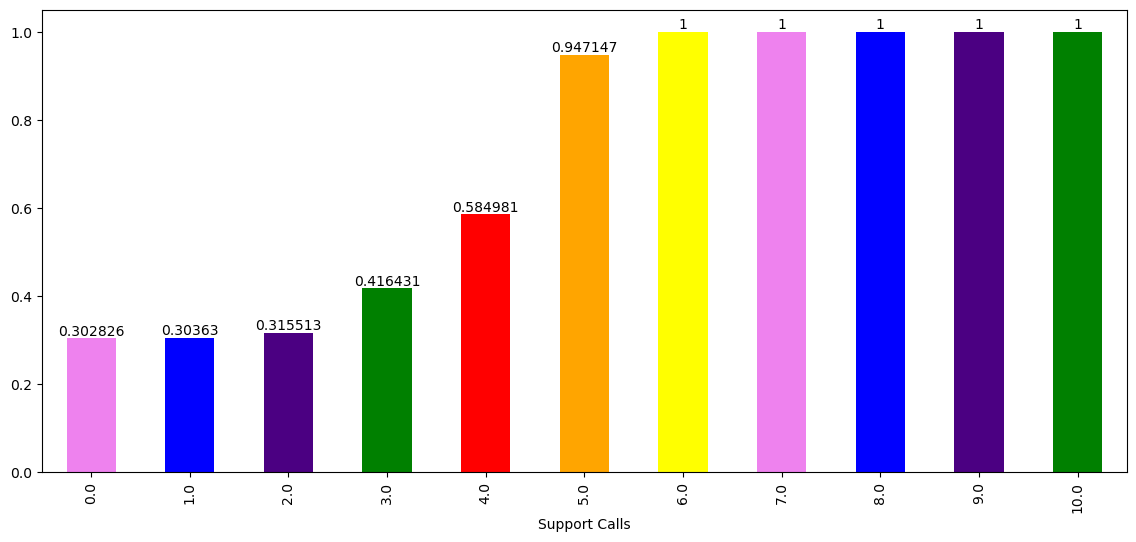

In [87]:
plt.figure(figsize=(14,6))
ax = df.groupby(df["Support Calls"])["Churn"].mean().plot(kind="bar",color=["violet","blue","indigo","green","red","orange","yellow"])
for container in ax.containers:
      ax.bar_label(container)
plt.show()

# Observations

Support Calls Strongly Predict Churn:
Customers with fewer than 3 support calls have a 30% chance of churn, while those with more than 6 calls have an almost 100% probability of churning.
After 5 support calls, the churn rate sharply increases—from 58% to 94%—highlighting a critical risk threshold.

# Interpretation/Reasons
A high number of support calls likely reflects persistent dissatisfaction or unresolved issues. If customers’ concerns are not addressed effectively, they are much more likely to leave the service.


# Recommendations

Root Cause Analysis of Support Calls:
Investigate the underlying reasons for frequent support calls (e.g., technical issues, billing problems, service outages).
Use surveys or feedback forms to identify the most common pain points.

Proactive and Empathetic Support:
Ensure support staff are empowered to resolve customer issues quickly and thoroughly.
For customers who contact support multiple times, escalate their cases, offer personalized solutions, or provide exclusive offers/apologies to rebuild trust.

Continuous Improvement:
Use support call data as an early warning system to spot and fix recurring problems, improving the overall customer experience and reducing future churn.

# 6. What is the relationship between payment delays and churn?
     Are frequent payment delays a strong churn indicator?
     How does average payment delay differ between churned and retained customers?


In [91]:
df[["Payment Delay","Churn"]].corr()

,Payment Delay,Churn
Payment Delay,1.000000,0.312129
Churn,0.312129,1.000000


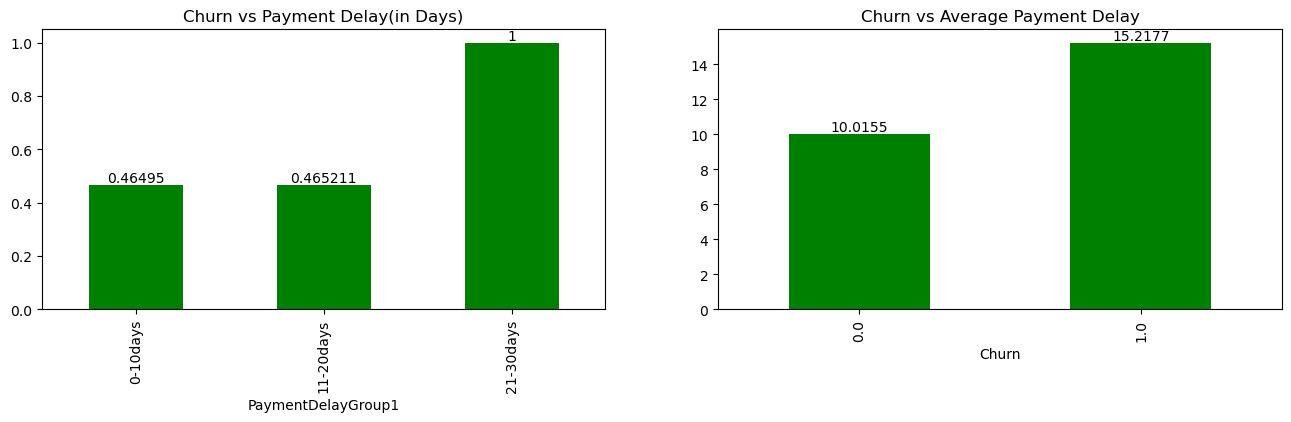

In [93]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.title("Churn vs Payment Delay(in Days)")
df["PaymentDelayGroup1"] = pd.cut(df["Payment Delay"],bins=[0,10,20,30],labels=["0-10days","11-20days","21-30days"])
ax = df.groupby(df["PaymentDelayGroup1"])["Churn"].mean().plot(kind="bar",color="green")
for container in ax.containers:
      ax.bar_label(container)

plt.subplot(2,2,2)
plt.title("Churn vs Average Payment Delay")
ax = df.groupby(df["Churn"])["Payment Delay"].mean().plot(kind="bar",color="green")
for container in ax.containers:
      ax.bar_label(container)
plt.show()

# Observations-:
1- Frequent Payment Delays are very strong churn Indicator as Customer have 100percent churn rate if customer have payment delayed of more than 20 days
2- Also retained customer haev average delay of usually 10 days in their payments whereas Churned customer have 15 days of average delay in their payments.


# Recommendations

1-Early Intervention for Payment Delays:Monitor customer payment behavior closely. Implement automated alerts for customers whose payment delays exceed 10 days.
Proactively reach out to these customers with reminders, flexible payment options, or personalized support to help them stay current and remain engaged.

2-Payment Flexibility and Incentives:Consider offering incentives for on-time payments or payment plans for customers facing financial difficulties.
Make it easy for customers to resolve payment issues quickly—through user-friendly billing platforms or dedicated support.

# 7.How do subscription type and contract length affect churn?
    Which subscription plans have the highest churn rates?
    Are annual or monthly contracts more stable?


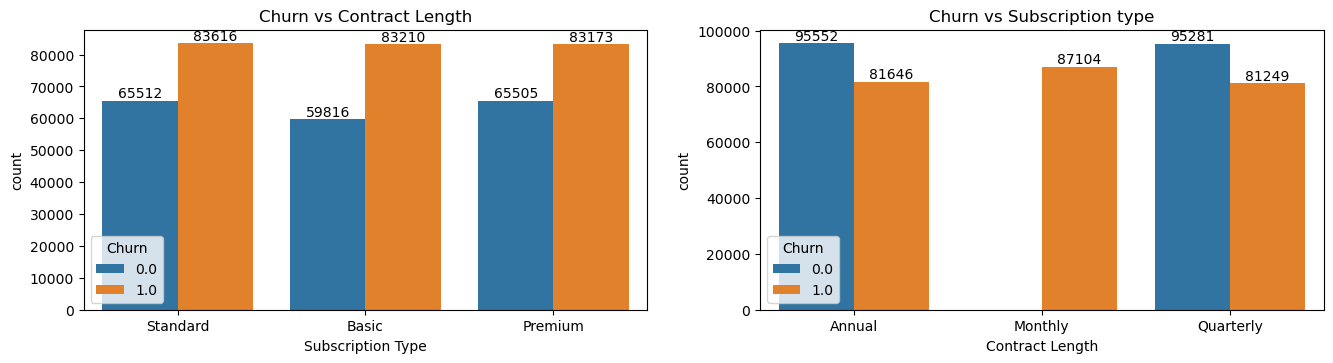

In [97]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.title("Churn vs Contract Length")
ax = sns.countplot(x="Subscription Type",hue="Churn",data=df)
for container in ax.containers:
     ax.bar_label(container)


plt.subplot(2,2,2)
plt.title("Churn vs Subscription type")
ax = sns.countplot(x="Contract Length",hue="Churn",data=df)
for container in ax.containers:
     ax.bar_label(container)
plt.show()

# Observations-:
1) Subscription type Does not have big impact on Customer Churn as we can see Each subscription type(Standard,Basic,Premium) have almost same churn of 83 thousand customers
2) Contract Length have big impact on Customer Churn rate as we can see Monthly contract almost have 100% probability thay customer will churn.

# Recommendations-:
1) Company should prioritise and focus more on Monthly subscription by adding more exclusive offers, Maintaining budget friendly price and providing customised Services to users so to make users attracted toward services and decrease the churn rate and improve retention rate and Customer Lifetime Value(CLV).

# 8.	What is the Average Customer Lifetime Value(CLV) for churned vs. retained customers?
        Here Current Customer lifetime value will be Total Spent by Customer on telecom services


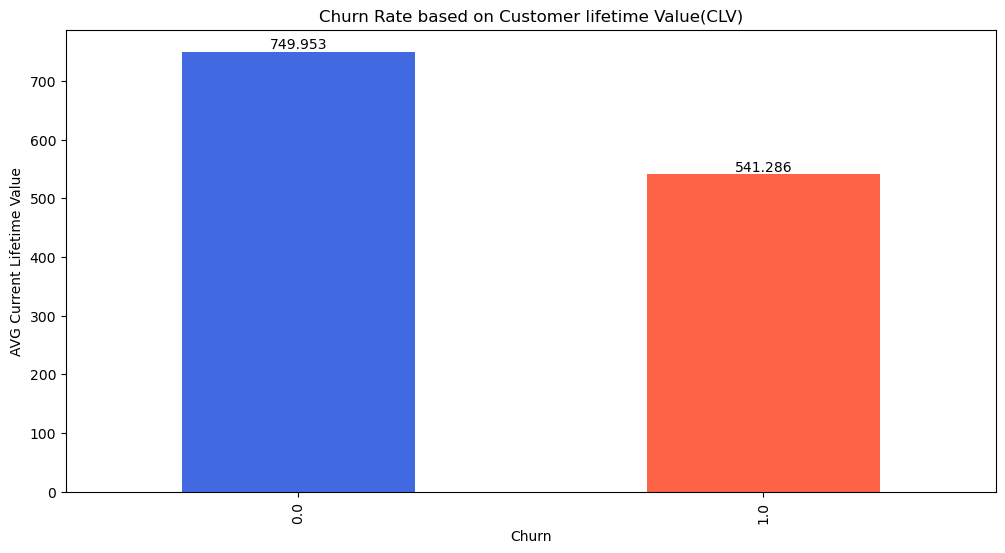

In [101]:
plt.figure(figsize=(12,6))
plt.title("Churn Rate based on Customer lifetime Value(CLV)")
plt.xlabel("Churn")
plt.ylabel("AVG Current Lifetime Value")
ax = df.groupby("Churn")["Total Spend"].mean().plot(kind="bar",color= ['royalblue', 'tomato'])
for container in ax.containers:
   ax.bar_label(container)
plt.show()

# Observation-:

Analysis reveals that retained customers have a mean CLV of $749, while churned customer average only $541. 

This demonstrates the strong financial impact of customer retention and highlights the value of targeted strategies to reduce churn and extend customer relationships.

# 9 - What’s the CLV difference between segments?
What is CLV?
CLV measures how much money, on average, a customer will bring to a business before they churn (leave/cancel).

Why it matters:
Helps businesses decide how much to spend on acquiring or retaining customers.
Reveals the most valuable customer segments.
Drives marketing, retention, and product strategies.



CLV = Average Spend by customer per period* Avg lifespan of customer

In [105]:
df["Current CLV"] = df["Total Spend"]

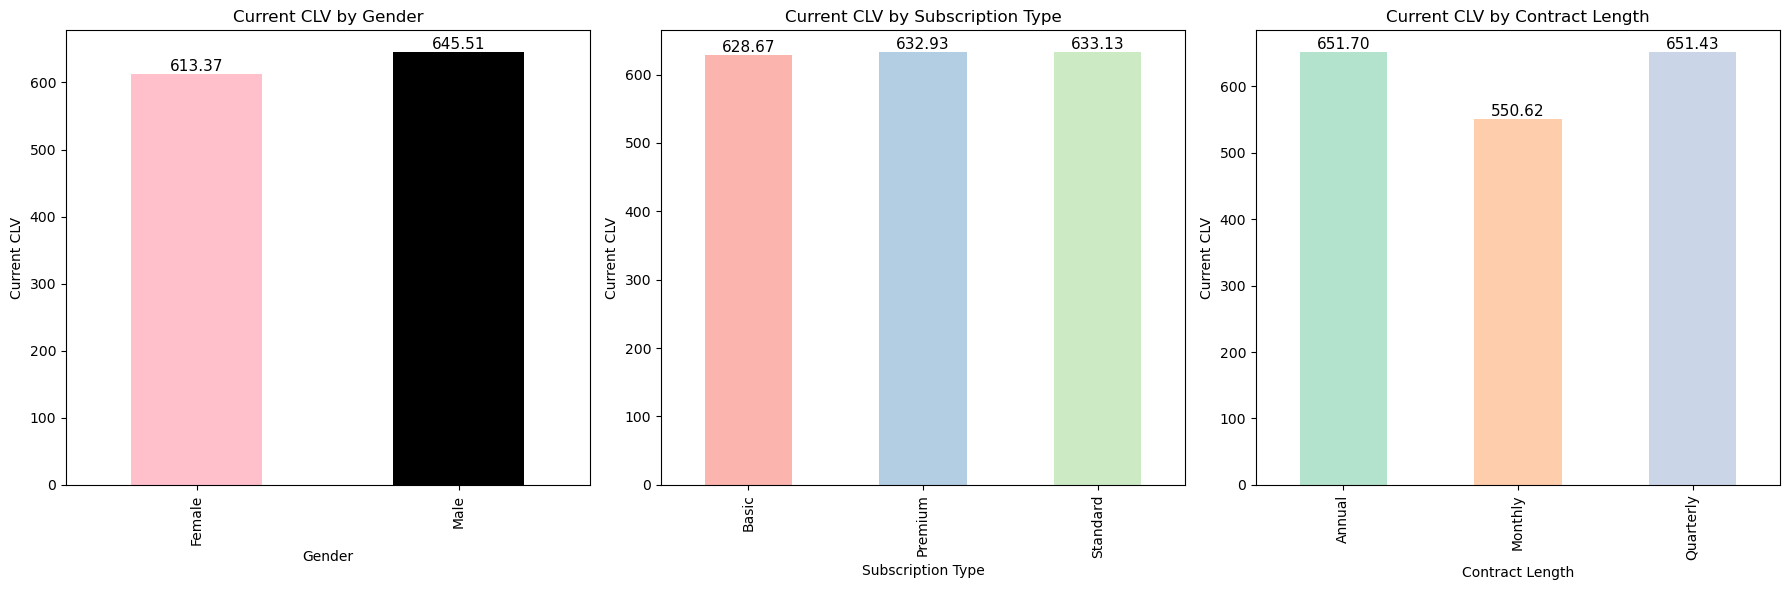

In [107]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18,6))  # 1 row, 3 columns

# 1. CLV by Gender
axes[0].set_title("Current CLV by Gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Current CLV")
ax1 = df.groupby("Gender")["Current CLV"].mean().plot(
    kind="bar", ax=axes[0], color=['pink', 'black'])
for bar in ax1.patches:
    ax1.annotate(f'{bar.get_height():.2f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=11)


# 2. CLV by Subscription Type
axes[1].set_title("Current CLV by Subscription Type")
axes[1].set_xlabel("Subscription Type")
axes[1].set_ylabel("Current CLV")
colors2 = plt.cm.Pastel1.colors  # Use a nice color palette for more than 2 categories
ax2 = df.groupby("Subscription Type")["Current CLV"].mean().plot(
    kind="bar", ax=axes[1], color=colors2)
for bar in ax2.patches:
    ax2.annotate(f'{bar.get_height():.2f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=11)

# 3. CLV by Contract Length
axes[2].set_title("Current CLV by Contract Length")
axes[2].set_xlabel("Contract Length")
axes[2].set_ylabel("Current CLV")
colors3 = plt.cm.Pastel2.colors
ax3 = df.groupby("Contract Length")["Current CLV"].mean().plot(
    kind="bar", ax=axes[2], color=colors3)
for bar in ax3.patches:
    ax3.annotate(f'{bar.get_height():.2f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


# Observations: Customer Lifetime Value (CLV) by Segment

# CLV by Gender:
Male customers have a slightly higher average CLV than female customers. This aligns with previous findings that males have a higher retention rate, leading to longer tenure and greater lifetime value.

# CLV by Subscription Type:
CLV does not significantly differ between subscription types (Basic, Premium, Standard). This suggests that, on average, customers spend a similar amount over their lifetime, regardless of their plan tier.

# CLV by Contract Length:
Customers with monthly contracts have much lower CLV compared to those on annual or quarterly plans. This is likely because monthly contract customers are more prone to churn and have shorter tenures, resulting in less lifetime value.

# 10.Are there behavioral or engagement patterns before churn?
    What does “last interaction”(numberof days) look like for those who churn?
    Is there a drop-off in usage before cancellation?


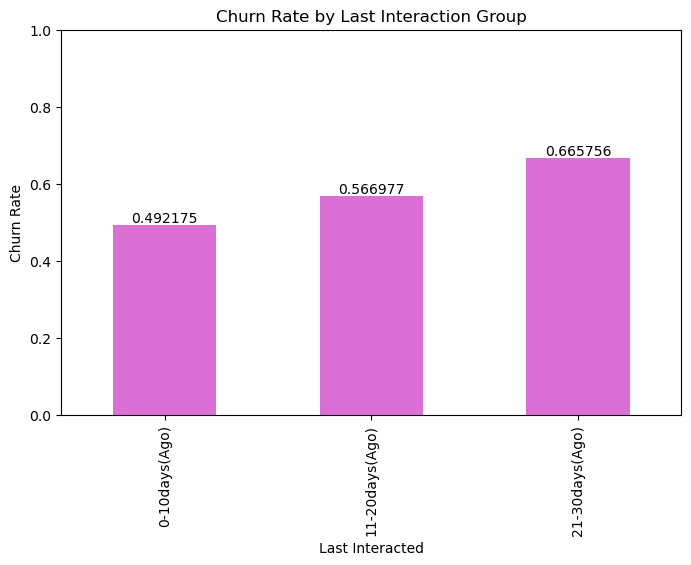

In [111]:
df["Last Intercated"] = pd.cut(df["Last Interaction"],bins=[0,10,20,30],labels=['0-10days(Ago)','11-20days(Ago)','21-30days(Ago)'])
import matplotlib.pyplot as plt
ax = churn_by_last = df.groupby('Last Intercated')['Churn'].mean().plot(kind='bar', color='orchid', figsize=(8,5))
for container in ax.containers:
    ax.bar_label(container)
plt.title('Churn Rate by Last Interaction Group')
plt.xlabel('Last Interacted')
plt.ylabel('Churn Rate')
plt.ylim(0,1)
plt.show()


# observations-:

1-Our data indicates customer who interacted recently(0-10 days ago) are less likely to discontinue services as compared to customers who intercated (11-20days) or (20-30 days) ago.

2)- So there is clearly a drop off in Customer Usage before they discontinue or leave the Service

# Predictive Anlaytics(Classification) Using Machine Learning

# 10- Encoding/Transforming

In [116]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
new =encoder.fit_transform(df[["Gender"]])
df["Gender"] = new[:,1]
df.rename({"Gender":"Male"},axis=1,inplace=True)

In [118]:
import pickle
encoder_x = pickle.dump(encoder,open("encoder_x.pkl","wb"))
encoder_x

In [120]:
df_new =df.copy()

In [122]:
dummies1 = pd.get_dummies(df_new["Subscription Type"],dtype=int)
dummies2= pd.get_dummies(df_new["Contract Length"],dtype=int)
df_new  =pd.concat([df,dummies1,dummies2],axis=1)
df_new.drop(["Subscription Type","Contract Length","Last Interaction"],axis=1,inplace=True)

In [124]:
df_new

,CustomerID,Age,Male,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Churn,Age Group,...,UsageFrequncyCategory10,PaymentDelayGroup1,Current CLV,Last Intercated,Basic,Premium,Standard,Annual,Monthly,Quarterly
0,2.0,30.0,0.0,39.0,14.0,5.0,18.0,932.00,1.0,18-30,...,Medium Usage(8-16),11-20days,932.00,11-20days(Ago),0,0,1,1,0,0
1,3.0,65.0,0.0,49.0,1.0,10.0,8.0,557.00,1.0,61-80,...,Low Usage(0-8),0-10days,557.00,0-10days(Ago),1,0,0,0,1,0
2,4.0,55.0,0.0,14.0,4.0,6.0,18.0,185.00,1.0,61-80,...,Low Usage(0-8),11-20days,185.00,0-10days(Ago),1,0,0,0,0,1
3,5.0,58.0,1.0,38.0,21.0,7.0,7.0,396.00,1.0,61-80,...,High Usage(16-30),0-10days,396.00,21-30days(Ago),0,0,1,0,1,0
4,6.0,23.0,1.0,32.0,20.0,5.0,8.0,617.00,1.0,18-30,...,High Usage(16-30),0-10days,617.00,11-20days(Ago),1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,1.0,54.0,15.0,1.0,3.0,716.38,0.0,31-45,...,Medium Usage(8-16),0-10days,716.38,0-10days(Ago),0,1,0,1,0,0
440829,449996.0,25.0,0.0,8.0,13.0,1.0,20.0,745.38,0.0,18-30,...,Medium Usage(8-16),11-20days,745.38,0-10days(Ago),0,1,0,1,0,0
440830,449997.0,26.0,1.0,35.0,27.0,1.0,5.0,977.31,0.0,18-30,...,High Usage(16-30),0-10days,977.31,0-10days(Ago),0,0,1,0,0,1
440831,449998.0,28.0,1.0,55.0,14.0,2.0,0.0,602.55,0.0,18-30,...,Medium Usage(8-16),NaN,602.55,0-10days(Ago),0,0,1,0,0,1


In [126]:
df_new.drop(["CustomerID","Age Group","Tenure-Group","UsageFrequncyCategory10","PaymentDelayGroup1","Last Intercated","PaymentDelayGroup1"],axis=1,inplace=True)

In [128]:
df_new

,Age,Male,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Churn,Current CLV,Basic,Premium,Standard,Annual,Monthly,Quarterly
0,30.0,0.0,39.0,14.0,5.0,18.0,932.00,1.0,932.00,0,0,1,1,0,0
1,65.0,0.0,49.0,1.0,10.0,8.0,557.00,1.0,557.00,1,0,0,0,1,0
2,55.0,0.0,14.0,4.0,6.0,18.0,185.00,1.0,185.00,1,0,0,0,0,1
3,58.0,1.0,38.0,21.0,7.0,7.0,396.00,1.0,396.00,0,0,1,0,1,0
4,23.0,1.0,32.0,20.0,5.0,8.0,617.00,1.0,617.00,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,1.0,54.0,15.0,1.0,3.0,716.38,0.0,716.38,0,1,0,1,0,0
440829,25.0,0.0,8.0,13.0,1.0,20.0,745.38,0.0,745.38,0,1,0,1,0,0
440830,26.0,1.0,35.0,27.0,1.0,5.0,977.31,0.0,977.31,0,0,1,0,0,1
440831,28.0,1.0,55.0,14.0,2.0,0.0,602.55,0.0,602.55,0,0,1,0,0,1


In [130]:
df_new.corr()

,Age,Male,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Churn,Current CLV,Basic,Premium,Standard,Annual,Monthly,Quarterly
Age,1.000000,-0.031419,-0.011630,-0.007190,0.158451,0.061738,-0.084684,0.218394,-0.084684,0.004768,-0.002873,-0.001847,-0.034986,0.086909,-0.035617
Male,-0.031419,1.000000,0.007978,0.007978,-0.091212,-0.048449,0.066138,-0.175395,0.066138,-0.000725,0.003189,-0.002469,0.029391,-0.067611,0.025533
Tenure,-0.011630,0.007978,1.000000,-0.026800,-0.027640,-0.016588,0.019006,-0.051919,0.019006,0.027270,-0.015415,-0.011580,0.009021,-0.020637,0.007744
Usage Frequency,-0.007190,0.007978,-0.026800,1.000000,-0.022013,-0.014470,0.018631,-0.046101,0.018631,0.000096,0.000149,-0.000244,0.006943,-0.017820,0.007534
Support Calls,0.158451,-0.091212,-0.027640,-0.022013,1.000000,0.162889,-0.221594,0.574267,-0.221594,0.010780,-0.006219,-0.004453,-0.091068,0.223242,-0.090289
Payment Delay,0.061738,-0.048449,-0.016588,-0.014470,0.162889,1.000000,-0.121044,0.312129,-0.121044,0.005085,-0.004229,-0.000805,-0.049697,0.122674,-0.049961
Total Spend,-0.084684,0.066138,0.019006,0.018631,-0.221594,-0.121044,1.000000,-0.429355,1.000000,-0.008469,0.003882,0.004501,0.068365,-0.166916,0.067234
Churn,0.218394,-0.175395,-0.051919,-0.046101,0.574267,0.312129,-0.429355,1.000000,-0.429355,0.020526,-0.011072,-0.009247,-0.175965,0.433553,-0.176244
Current CLV,-0.084684,0.066138,0.019006,0.018631,-0.221594,-0.121044,1.000000,-0.429355,1.000000,-0.008469,0.003882,0.004501,0.068365,-0.166916,0.067234
Basic,0.004768,-0.000725,0.027270,0.000096,0.010780,0.005085,-0.008469,0.020526,-0.008469,1.000000,-0.494377,-0.495506,-0.001345,0.009607,-0.006461


In [132]:
#Insights
#Support calls is affecting the Churn rate more the Support Calls More the churn is means more support calls is because of customer dissatifaction from service or something
#-Payemtn delay is also affecting churn means user cant able to enjoy premium benefit if they didnt pay on time thus making them cancel subscription

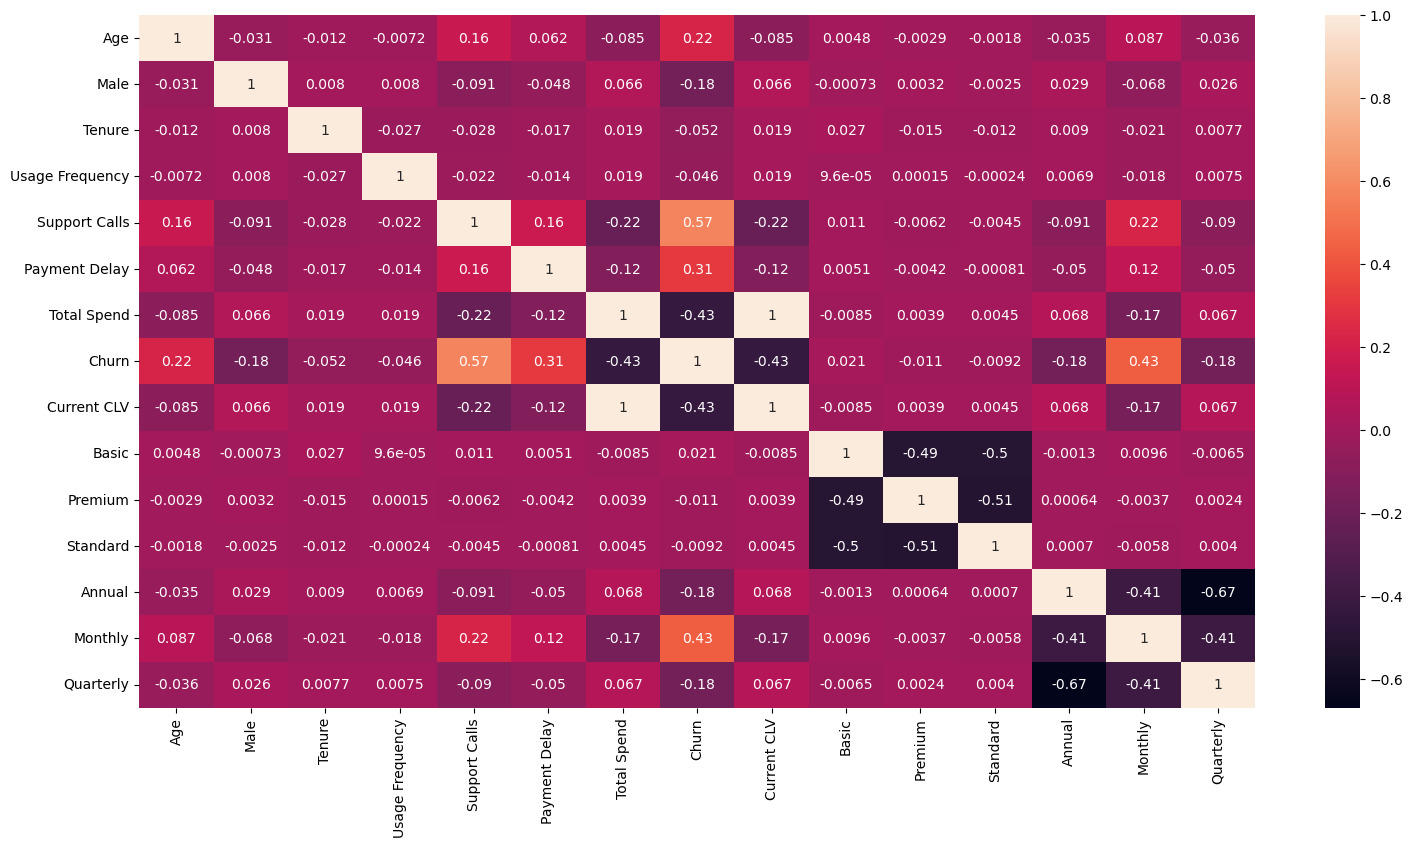

In [134]:
plt.figure(figsize=(18,9))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

# 12 - Training And Comparing Machine Models for Predictive Analytics

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
import pickle
warnings.filterwarnings("ignore")

In [139]:
X = df_new.drop(["Churn"],axis=1)
y = df_new["Churn"]
X.dropna(inplace=True)
y.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pickle.dump(scaler,open("scaler_x.pkl","wb"))

In [141]:
models = {
    "Logistic Regression": LogisticRegression(),
    "XGB Classifier": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss'),
    "AdaBoostClassifier": AdaBoostClassifier(n_estimators=100),
    "CatBoostClassifier": CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=0)
}

for name, model in models.items():
    trained = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    print(f"Accuracy: {name} {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {name} {f1_score(y_test, y_pred):.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    if name=="Logistic Regression":
        pickle.dump(model,open("model_L.pkl","wb"))


Accuracy: Logistic Regression 0.8908
F1 Score: Logistic Regression 0.9017
[[51605  5555]
 [ 8883 66207]]
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88     57160
         1.0       0.92      0.88      0.90     75090

    accuracy                           0.89    132250
   macro avg       0.89      0.89      0.89    132250
weighted avg       0.89      0.89      0.89    132250

--------------------------------------------------
Accuracy: XGB Classifier 0.9913
F1 Score: XGB Classifier 0.9923
[[57156     4]
 [ 1141 73949]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     57160
         1.0       1.00      0.98      0.99     75090

    accuracy                           0.99    132250
   macro avg       0.99      0.99      0.99    132250
weighted avg       0.99      0.99      0.99    132250

--------------------------------------------------
Accuracy: AdaBoostClassifier 0.9748
F1 Score

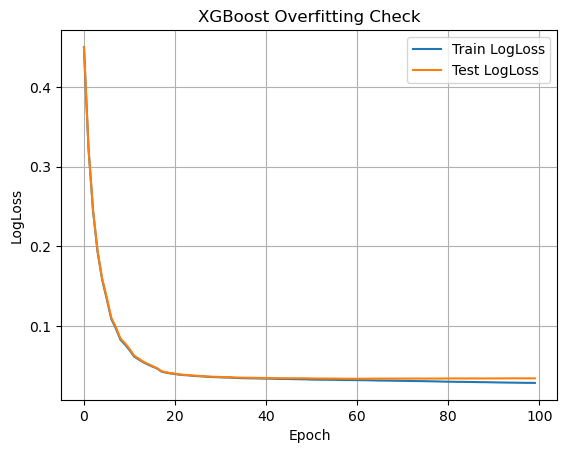

In [145]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

results = xgb_model.evals_result()

# Plot learning curves
plt.plot(results['validation_0']['logloss'], label='Train LogLoss')
plt.plot(results['validation_1']['logloss'], label='Test LogLoss')
plt.xlabel('Epoch')
plt.ylabel('LogLoss')
plt.title('XGBoost Overfitting Check')
plt.legend()
plt.grid(True)
plt.show()


# 10.Which features (variables) are the strongest predictors of churn?
     Using feature importance from your models, what drives churn most?
     How do these insights translate into actionable business recommendations?


In [148]:
features = X.columns
importance = models["XGB Classifier"].feature_importances_
df_feature = pd.DataFrame({"features":features,"importance":importance})
df_feature

,features,importance
0,Age,0.040593
1,Male,0.017845
2,Tenure,0.006310
3,Usage Frequency,0.002080
4,Support Calls,0.259905
5,Payment Delay,0.063749
6,Total Spend,0.096950
7,Current CLV,0.000000
8,Basic,0.014603
9,Premium,0.000661


# Observations-:
1)- Monthly subscription considered as strongrest features for Churn.AS it alone ha 49 percent probability of affectign customer to leave a service.
It shows the problems iwht montly subscriptins
2)Support Calls considered as strongest features of Churn. support calls alone have 25 percent probability of customer leaving a services.This more focus on Support calls and figuring out the underlying issue behind support calls are important for good retention rate and to prevent churn.

# 11.How do high-risk customer segments differ from others?
    What are the characteristics of the top decile of churn risk according to your model?
    How big are these segments, and what strategies could target them?


In [152]:
scaler = pickle.load(open("scaler_x.pkl", "rb"))
X_scaled = scaler.transform(X)

In [154]:
df["y_prob"] = model.predict_proba(X_scaled)[:,1]

def risk_segment(prob):
    if prob >= 0.7:
        return 'High Risk'
    elif prob >= 0.5:
        return 'Medium Risk'
    else:
        return 'Low Risk'
df["segment"] = df["y_prob"].apply(risk_segment)

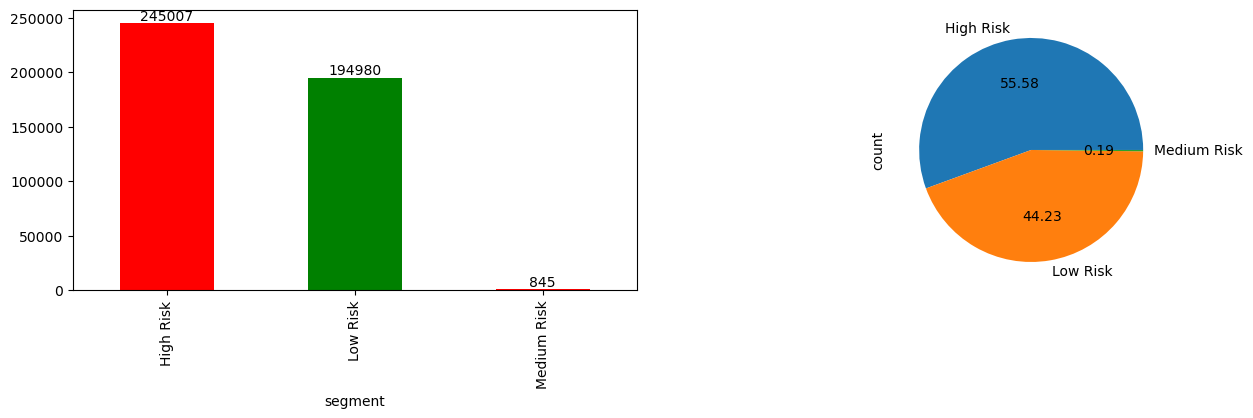

In [156]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
ax = df["segment"].value_counts().plot(kind="bar",color=['red','green'])
for container in ax.containers:
     ax.bar_label(container)

plt.subplot(2,2,2)
ax = df["segment"].value_counts().plot(kind="pie",autopct="%0.2f")
for container in ax.containers:
     ax.bar_label(container)
plt.show()

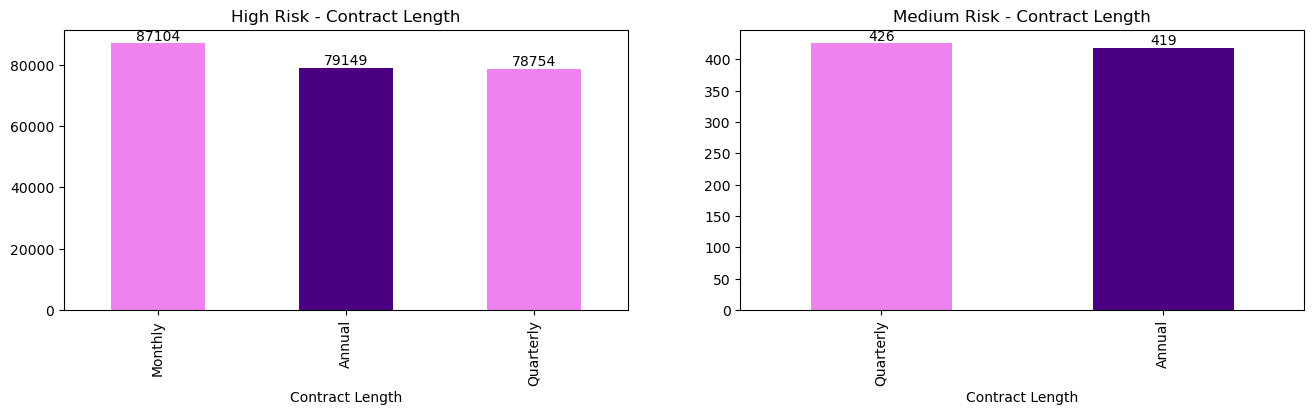

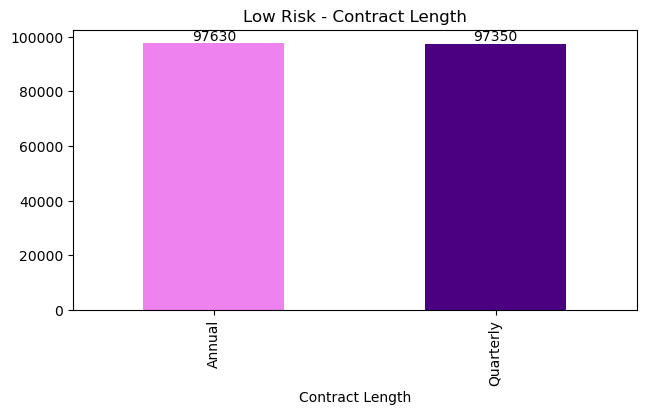

In [158]:

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
ax = df[df["segment"] == "High Risk"]["Contract Length"].value_counts().plot(kind='bar', title="High Risk - Contract Length",color=["violet","indigo"])
for container in ax.containers:
     ax.bar_label(container)


plt.subplot(2,2,2)
ax = df[df["segment"] == "Medium Risk"]["Contract Length"].value_counts().plot(kind='bar', title="Medium Risk - Contract Length",color=["violet","indigo"])
for container in ax.containers:
     ax.bar_label(container)



plt.figure(figsize=(16,8))
plt.subplot(2,2,3)
ax = df[df["segment"] == "Low Risk"]["Contract Length"].value_counts().plot(kind='bar', title="Low Risk - Contract Length",color=["violet","indigo"])
for container in ax.containers:
     ax.bar_label(container)
plt.show()



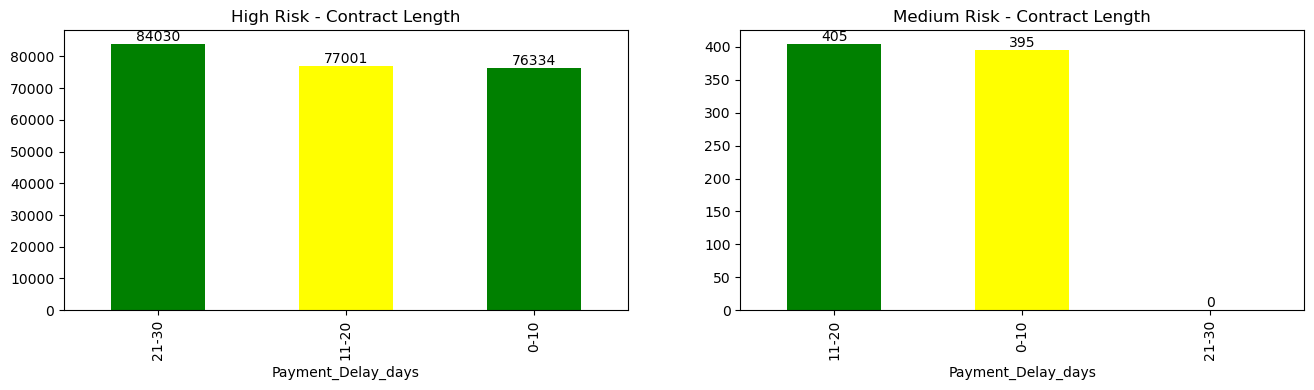

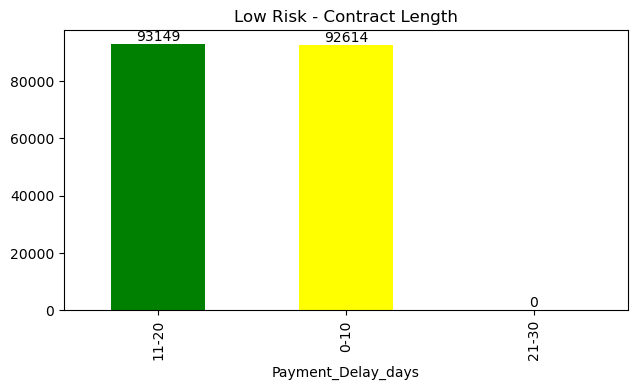

In [166]:

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
ax = df[df["segment"] == "High Risk"]["Payment_Delay_days"].value_counts().plot(kind='bar', title="High Risk - Contract Length",color=["green","yellow"])
for container in ax.containers:
     ax.bar_label(container)


plt.subplot(2,2,2)
ax = df[df["segment"] == "Medium Risk"]["Payment_Delay_days"].value_counts().plot(kind='bar', title="Medium Risk - Contract Length",color=["green","yellow"])
for container in ax.containers:
     ax.bar_label(container)



plt.figure(figsize=(16,8))
plt.subplot(2,2,3)
ax = df[df["segment"] == "Low Risk"]["Payment_Delay_days"].value_counts().plot(kind='bar', title="Low Risk - Contract Length",color=["green","yellow"])
for container in ax.containers:
     ax.bar_label(container)
plt.show()



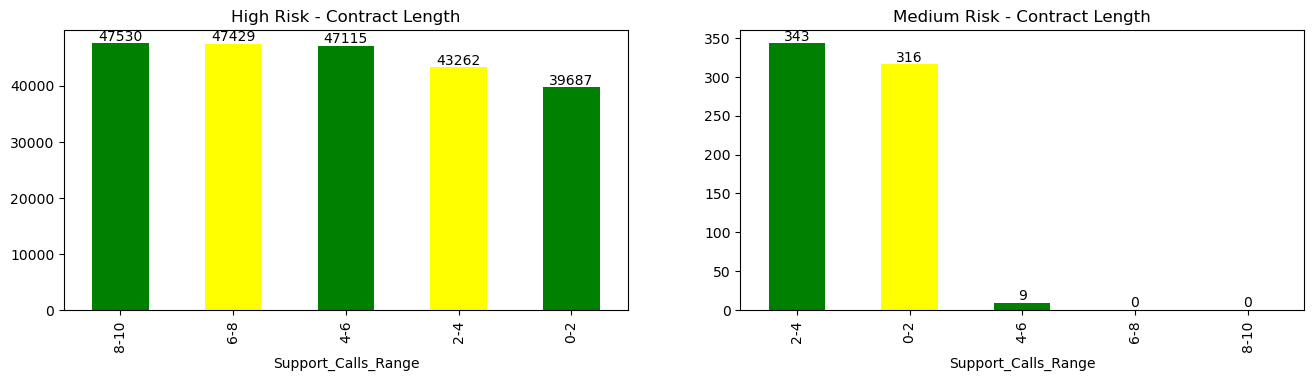

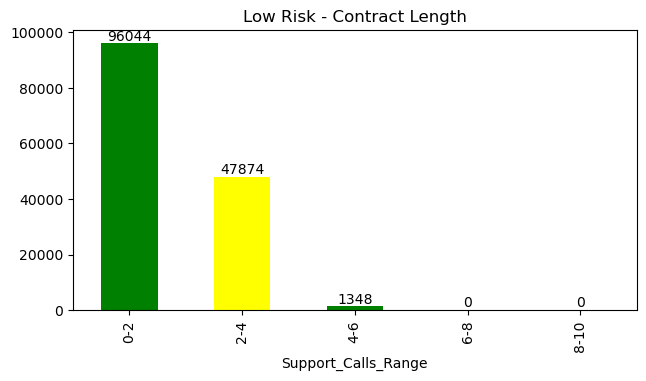

In [685]:

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
ax = df[df["segment"] == "High Risk"]["Support_Calls_Range"].value_counts().plot(kind='bar', title="High Risk - Contract Length",color=["green","yellow"])
for container in ax.containers:
     ax.bar_label(container)


plt.subplot(2,2,2)
ax = df[df["segment"] == "Medium Risk"]["Support_Calls_Range"].value_counts().plot(kind='bar', title="Medium Risk - Contract Length",color=["green","yellow"])
for container in ax.containers:
     ax.bar_label(container)



plt.figure(figsize=(16,8))
plt.subplot(2,2,3)
ax = df[df["segment"] == "Low Risk"]["Support_Calls_Range"].value_counts().plot(kind='bar', title="Low Risk - Contract Length",color=["green","yellow"])
for container in ax.containers:
     ax.bar_label(container)
plt.show()



# Top Decile Churn Risk Characteristics


1-Contract Length:
High-risk customers are overwhelmingly subscribed to monthly contracts.

Medium and low-risk users are mostly on long-term (12 or 24-month) contracts.

Insight: Monthly contracts are a strong churn signal.


2- Payment Delays

High-risk customers often have payment delays of 20+ days.

Medium/low-risk customers rarely exceed 5-day delays.

Insight: Late payments are an indicator of disengagement.

3-Support Calls

Most high-risk customers had more than 5 support interactions.

Medium and low-risk users typically had fewer than 3 or none.

Insight: Excessive support needs may correlate with dissatisfaction.

# Segment Sizes


High Risk	245,007	55%

Medium Risk	845	1%

Low Risk	194,980	44%

# Retention Strategy Recommendations -
# Model’s retention simulation projects up to 12% churn reduction if actions are applied effectively.

1. Contract Optimization

Target monthly-plan customers with:

Long-term upgrade incentives (e.g., discounts for 12/24-month commitment)
                              
Exclusive perks for extending contracts
                              
Personalized outreach using loyalty programs


2. Proactive Payment Management
                              
Trigger automated reminders before due dates
                              
Offer grace periods, flexible payment options
                              
Flag customers with 10+ day delays for early intervention
                                  
3. Support-Centric Improvements


Analyze top reasons for support contact among high-risk users
                                  
Improve self-service help options (chatbots, FAQs)
                                  
Assign dedicated success reps to frequently calling customers

# 12 -  Churn Reduction Using Retention Strategies(Reduced churn by 12%)

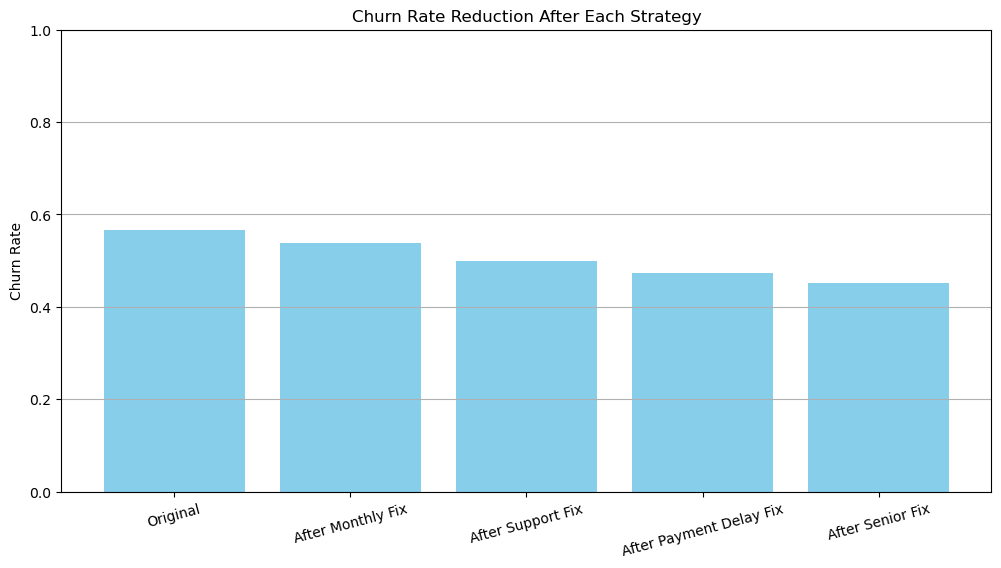

Original Churn Rate: 56.71%
After Monthly Fix: 53.75%
After Support Calls Fix: 49.92%
After Payment Delay Fix: 47.39%
After Senior (Age > 51) Fix: 45.21%


In [742]:
import matplotlib.pyplot as plt
import pandas as pd

# 1️⃣ Original churn rate
original_churn_rate = df["Churn"].mean()

# Monthly Contract Fix
df_simulated1 = df.copy()
target_group1 = (
    (df_simulated1["Contract Length"].str.strip().str.lower() == "monthly") &
    (df_simulated1["segment"] == "High Risk") &
    (df_simulated1["Churn"] == 1)
)
n1 = int(0.15 * target_group1.sum())
if n1 > 0:
    idx1 = df_simulated1[target_group1].sample(n=n1, random_state=42).index
    df_simulated1.loc[idx1, "Churn"] = 0
monthly_churn_rate = df_simulated1["Churn"].mean()
# 
Support Calls Fix
df_simulated2 = df_simulated1.copy()
target_group2 = (
    (df_simulated2["Support Calls"] > 5) &
    (df_simulated2["segment"] == "High Risk") &
    (df_simulated2["Churn"] == 1)
)
n2 = int(0.15 * target_group2.sum())
if n2 > 0:
    idx2 = df_simulated2[target_group2].sample(n=n2, random_state=42).index
    df_simulated2.loc[idx2, "Churn"] = 0
support_churn_rate = df_simulated2["Churn"].mean()

# Payment Delay Fix
df_simulated3 = df_simulated2.copy()
target_group3 = (
    (df_simulated3["Payment Delay"] > 20) &
    (df_simulated3["segment"] == "High Risk") &
    (df_simulated3["Churn"] == 1)
)
n3 = int(0.15 * target_group3.sum())
if n3 > 0:
    idx3 = df_simulated3[target_group3].sample(n=n3, random_state=42).index
    df_simulated3.loc[idx3, "Churn"] = 0
payment_churn_rate = df_simulated3["Churn"].mean()

# Age > 51 Fix (Senior customers)
df_simulated4 = df_simulated3.copy()
target_group4 = (
    (df_simulated4["Age"] > 51) &
    (df_simulated4["segment"] == "High Risk") &
    (df_simulated4["Churn"] == 1)
)
n4 = int(0.15 * target_group4.sum())
if n4 > 0:
    idx4 = df_simulated4[target_group4].sample(n=n4, random_state=42).index
    df_simulated4.loc[idx4, "Churn"] = 0
senior_churn_rate = df_simulated4["Churn"].mean()

# 📊 Bar chart to compare
rates = [
    original_churn_rate,
    monthly_churn_rate,
    support_churn_rate,
    payment_churn_rate,
    senior_churn_rate
]

labels = [
    "Original",
    "After Monthly Fix",
    "After Support Fix",
    "After Payment Delay Fix",
    "After Senior Fix"
]

plt.figure(figsize=(12, 6))
plt.bar(labels, rates, color="skyblue")
plt.title("Churn Rate Reduction After Each Strategy")
plt.ylabel("Churn Rate")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=15)
plt.show()

# 📝 Final Summary
print(f"Original Churn Rate: {original_churn_rate:.2%}")
print(f"After Monthly Fix: {monthly_churn_rate:.2%}")
print(f"After Support Calls Fix: {support_churn_rate:.2%}")
print(f"After Payment Delay Fix: {payment_churn_rate:.2%}")
print(f"After Senior (Age > 51) Fix: {senior_churn_rate:.2%}")


# Loyalty Strategies to Reduce Churn and Boost CLV

# 1.Contract Optimization Program
Problem Identified: Most high-risk churners are on monthly contracts.
Strategy:

Offer exclusive discounts or rewards to monthly subscribers who upgrade to annual or quarterly plans.
Introduce loyalty points for longer-term commitments.
Goal: Improve retention by increasing contract stickiness.


# 2.Proactive Support Outreach
Problem Identified: Customers with more than 5 support calls are at high risk.
Strategy:

Flag customers with rising support frequency.
Assign dedicated customer success agents or provide fast-track issue resolution.
Automate follow-ups after support calls to measure satisfaction.
Goal: Reduce churn due to unresolved frustration or repeated issues.


# 3. On-Time Payment Reminder Program
Problem Identified: Customers with payment delays >20 days have a much higher churn rate.
Strategy:

Send automated SMS/email reminders before due dates.
Introduce grace periods, auto-pay incentives, or payment flexibility.
Offer small loyalty credits for consistent on-time payers.
Goal: Build trust and reduce churn due to billing friction.


# 4.Senior-Centric Retention Campaign
Problem Identified: Customers aged 51+ show elevated churn risk.
Strategy:

Launch targeted messaging and simplified interfaces tailored to senior customers.
Offer exclusive senior loyalty benefits or educational support.
Use personal outreach or concierge support services for users 51+.
Goal: Improve confidence and comfort, building long-term loyalty with aging user base.


                                    
# 5 Personalized Engagement Lifecycle
Strategy:

Use behavior-triggered communications (e.g., inactivity alerts, usage tips).
Reward long-term usage milestones (e.g., 6 months of continuous use).
Send personalized offers based on churn risk, age, usage frequency.
Goal: Create emotional loyalty and keep customers engaged throughout their journey.

# 13.How would reducing churn impact CLV and overall revenue?
     If a retention campaign reduces churn by 12%, how much does projected CLV increase?
     What is the simulated business impact?


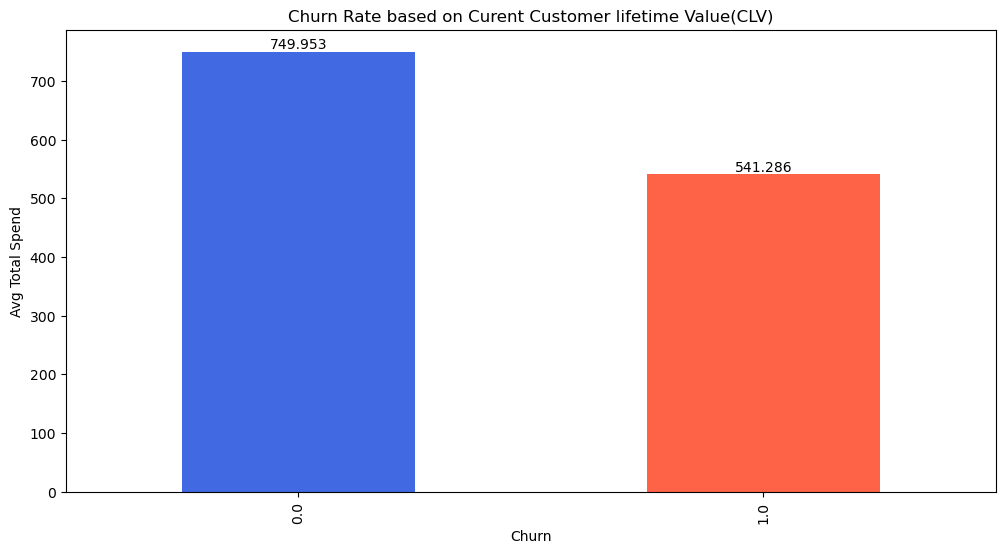

In [746]:
plt.figure(figsize=(12,6))
plt.title("Churn Rate based on Curent Customer lifetime Value(CLV)")
plt.xlabel("Churn")
plt.ylabel("Avg Total Spend")
ax = df.groupby("Churn")["Total Spend"].mean().plot(kind="bar",color= ['royalblue', 'tomato'])
for container in ax.containers:
   ax.bar_label(container)
plt.show()

# (A)- Current Average CLV and Revenue

In [770]:
# Realized (Observed) CLV = Total money spent by churned or active customers
observed_clv = df["Total Spend"].median()
print(f"Observed CLV (Average Total Spend): ${observed_clv:.2f}")


Observed CLV (Average Total Spend): $661.00


In [776]:
df["ARPU"] = df["Total Spend"] / df["Tenure"]
arpu = df["ARPU"].mean()
print(f"Average Revenue Per Month (ARPU): ${arpu:.2f}")

churn_rate = df["Churn"].mean()
print(f"Current Churn Rate: {churn_rate:.2%}")





Average Revenue Per Month (ARPU): $45.94
Current Churn Rate: 56.71%


In [790]:
projected_clv = arpu / churn_rate
print(f"Projected CLV per customer per month (based on current churn): ${projected_clv:.2f}")


Projected CLV per customer per month (based on current churn): $81.01


# (B) Reducing Churn by 20 Percent(leading to $20 avg CLV gain per customer per month)

In [793]:
new_churn_rate = churn_rate * (1 - 0.20)
new_projected_clv = arpu / new_churn_rate
clv_gain = new_projected_clv - projected_clv

print(f"New Projected CLV (after 12% churn reduction): ${new_projected_clv:.2f}")
print(f"CLV Gain per Customer: ${clv_gain:.2f}")


New Projected CLV (after 12% churn reduction): $101.26
CLV Gain per Customer: $20.25


In [803]:
n_customers = df.shape[0]
revenue_gain = n_customers * clv_gain

print(f"Projected Revenue Gain from 12% churn reduction: ${revenue_gain:,.2f}")
projected_revenue  =df["Total Spend"].sum()+revenue_gain
print("projected totla revenue",'$',projected_revenue)

Projected Revenue Gain from 12% churn reduction: $8,927,998.02
projected totla revenue $ 287364640.7363792


In [ ]:
# Reducing Churn by 30percent Will INcrease Tenure by 24 percent

In [756]:
# Assumptions
ARPU = 631  # average revenue per user per month

# Original churn rate
original_churn_rate = df["Churn"].mean()

# New churn rate after 12% relative reduction
reduction_percent = 0.12
new_churn_rate = original_churn_rate * (1 - reduction_percent)

# CLV estimates
original_clv = ARPU / original_churn_rate
new_clv = ARPU / new_churn_rate
clv_gain = new_clv - original_clv

# Revenue impact
n_customers = len(df)
original_revenue = n_customers * original_clv
new_revenue = n_customers * new_clv
revenue_gain = new_revenue - original_revenue

# Print results
print(f"Original Churn Rate: {original_churn_rate:.2%}")
print(f"New Churn Rate: {new_churn_rate:.2%} (12% reduction)")
print(f"Original CLV: ${original_clv:.2f}")
print(f"New CLV: ${new_clv:.2f}")
print(f"CLV Gain per Customer: ${clv_gain:.2f}")
print(f"Projected Total Revenue Gain (for {n_customers} customers): ${revenue_gain:,.2f}")


Original Churn Rate: 56.71%
New Churn Rate: 49.91% (12% reduction)
Original CLV: $1112.66
New CLV: $1264.39
CLV Gain per Customer: $151.73
Projected Total Revenue Gain (for 440832 customers): $66,886,101.96


In [ ]:
mask = (
    (df["Contract Length"] == "Monthly") &
    (df["segment"] == "High Risk") &
    (df["Churn"] == 1)
)

print("Number of monthly high-risk churners:", mask.sum())


# 14 - Importing Csv File for Tableu Dashboard
We will make Tableu Dashboar to better visualize churn risk and customer segments, enabling business stakeholders to identify high-impact retention opportunities.

In [162]:
df["Tenure_months"]=pd.cut(df["Tenure"],bins=[0,10,20,30,40,50,60],labels=['0-10','11-20','21-30','31-40','41-50','51-60'])
df["Usage_Frequency_days"]=pd.cut(df["Usage Frequency"],bins=[0,10,20,30],labels=['0-10','11-20','21-30'])
df["Payment_Delay_days"]=pd.cut(df["Payment Delay"],bins=[0,10,20,30],labels=['0-10','11-20','21-30'])
df["Last_Interaction_days"]=pd.cut(df["Last Interaction"],bins=[0,10,20,30],labels=['0-10','11-20','21-30'])
df["Support_Calls_Range"]=pd.cut(df["Support Calls"],bins=[0,2,4,6,8,10],labels=['0-2','2-4','4-6','6-8','8-10'])
df["Age_group"]=pd.cut(df["Age"],bins=[0,10,20,30,40,50,60,70],labels=['0-10','11-20','21-30','31-40','41-50','51-60','61-70'])


In [849]:
df.to_csv("Tableuchurn1.csv",index=False)